# Analise de resultados de MDC

In [44]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
  
# Opening JSON file
f = open('../test/GCD_results.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame(data)

In [46]:

df["log(B)base10"] = df.apply(lambda row: len(row.b) , axis=1)
df

,a,b,gasWhenCalculateOnChain,initialGasCalculate,executionGasCalculate,gasWhenValidateOnChain,initialGasValidate,executionGasValidate,RatioCalculateVsValidate,log(B)base10
0,1438807111543,5,1246,687,559,1787,1570,217,0.697258,1
1,181190002710880141453252553871,94477639180455185,4338,855,3483,2039,1822,217,2.127513,17
2,107881733781241218232,101577722,2608,759,1849,1955,1738,217,1.334015,9
3,3335481907077,163809942144,3014,735,2279,1895,1678,217,1.590501,12
4,849,106,1026,639,387,1751,1534,217,0.585951,3
...,...,...,...,...,...,...,...,...,...,...
2995,16057880192717468670459873,13470970262477,3602,807,2795,1979,1762,217,1.820111,14
2996,84438391767575,1646,1516,699,817,1871,1654,217,0.810262,4
2997,603171228451947464743767780151,1676580,1870,795,1075,1931,1714,217,0.968410,7
2998,1616123082805367959867,532106111,2608,759,1849,1907,1690,217,1.367593,9


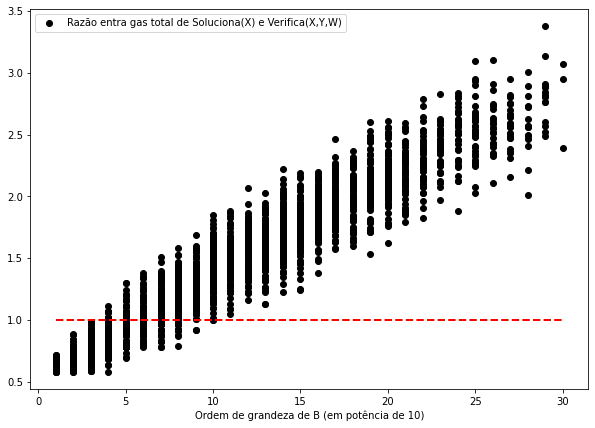

In [59]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)


# Plot da razao de custo de vs a ordem de grandeza de B
plt.scatter(df['log(B)base10'], df['RatioCalculateVsValidate'],c='black', label='Razão entra gas total de Soluciona(X) e Verifica(X,Y,W)')
plt.hlines(y=1, xmin=1, xmax=30, colors='red', linestyles='--', lw=2)
plt.legend()
plt.xlabel("Ordem de grandeza de B (em potência de 10)")

plt.show()

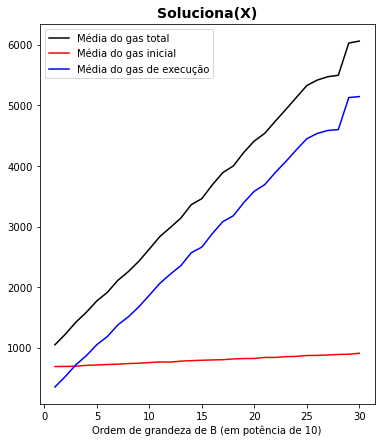

In [67]:
df_calculate = df[['gasWhenCalculateOnChain', 'initialGasCalculate', 'executionGasCalculate', 'log(B)base10']]
df_calculate_grouped = df_calculate.groupby(['log(B)base10']).mean()

f = plt.figure()
f.set_figwidth(6)
f.set_figheight(7)


plt.plot(df_calculate_grouped.index.values, df_calculate_grouped['gasWhenCalculateOnChain'],c='black', label='Média do gas total')
plt.plot(df_calculate_grouped.index.values, df_calculate_grouped['initialGasCalculate'],c='red', label='Média do gas inicial')
plt.plot(df_calculate_grouped.index.values, df_calculate_grouped['executionGasCalculate'],c='blue', label='Média do gas de execução')
plt.legend()
plt.title("Soluciona(X)", {'fontsize': 14, 'fontweight' : 600})
plt.xlabel("Ordem de grandeza de B (em potência de 10)")

plt.show()

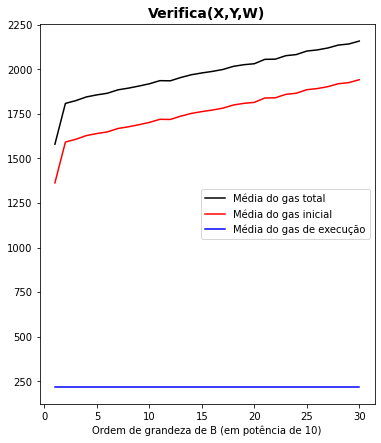

In [68]:
df_validate = df[['gasWhenValidateOnChain', 'initialGasValidate', 'executionGasValidate', 'log(B)base10']]
df_validate_grouped = df_validate.groupby(['log(B)base10']).mean()

f = plt.figure()
f.set_figwidth(6)
f.set_figheight(7)

plt.plot(df_validate_grouped.index.values, df_validate_grouped['gasWhenValidateOnChain'],c='black', label='Média do gas total')
plt.plot(df_validate_grouped.index.values, df_validate_grouped['initialGasValidate'],c='red', label='Média do gas inicial')
plt.plot(df_validate_grouped.index.values, df_validate_grouped['executionGasValidate'],c='blue', label='Média do gas de execução')
plt.legend()
plt.title("Verifica(X,Y,W)", {'fontsize': 14, 'fontweight' : 600})
plt.xlabel("Ordem de grandeza de B (em potência de 10)")

plt.show()

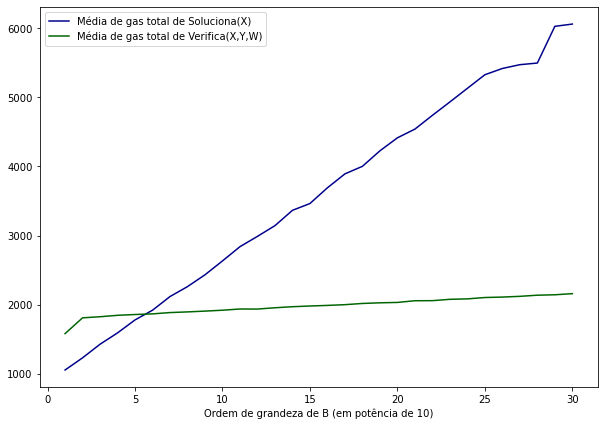

In [63]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.plot(df_validate_grouped.index.values, df_calculate_grouped['gasWhenCalculateOnChain'],c='darkblue', label="Média de gas total de Soluciona(X)")
plt.plot(df_validate_grouped.index.values, df_validate_grouped['gasWhenValidateOnChain'],c='darkgreen', label="Média de gas total de Verifica(X,Y,W)")
plt.legend()
plt.xlabel("Ordem de grandeza de B (em potência de 10)")

plt.show()

In [72]:
df.min()

a                                10
b                                 1
gasWhenCalculateOnChain         928
initialGasCalculate             627
executionGasCalculate           301
gasWhenValidateOnChain         1355
initialGasValidate             1138
executionGasValidate            217
RatioCalculateVsValidate    0.57979
log(B)base10                      1
dtype: object

In [73]:
df.max()


a                           99936435973677296917898007
b                                        9986060698909
gasWhenCalculateOnChain                           7212
initialGasCalculate                                915
executionGasCalculate                             6321
gasWhenValidateOnChain                            2159
initialGasValidate                                1942
executionGasValidate                               217
RatioCalculateVsValidate                       3.37799
log(B)base10                                        30
dtype: object